In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [65]:
crypto_df=pd.read_csv("Resources/crypto_data.csv")

In [66]:
crypto_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [68]:
crypto_df['TotalCoinSupply'].value_counts()

0             92
21000000      64
100000000     62
1000000000    43
50000000      23
              ..
39200000       1
270875968      1
9736000        1
3652422000     1
233100000      1
Name: TotalCoinSupply, Length: 546, dtype: int64

In [27]:
crypto_df=crypto_df[crypto_df['IsTrading']==True]
crypto_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [28]:
crypto_df.drop('IsTrading', axis=1, inplace=True)

/Users/sudippandey/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [30]:
crypto_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [31]:
crypto_df.isna().sum()

Unnamed: 0           0
CoinName             0
Algorithm            0
ProofType            0
TotalCoinsMined    459
TotalCoinSupply      0
dtype: int64

In [32]:
crypto_df=crypto_df[crypto_df['TotalCoinsMined']>0]
crypto_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [33]:
crypto_df.isna().sum()

Unnamed: 0         0
CoinName           0
Algorithm          0
ProofType          0
TotalCoinsMined    0
TotalCoinSupply    0
dtype: int64

In [34]:
crypto_df.drop(['CoinName','Unnamed: 0'], axis=1, inplace=True)

/Users/sudippandey/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [38]:
final_df=pd.get_dummies(crypto_df)

In [41]:
std_scr=StandardScaler()
scaled_data=std_scr.fit_transform(final_df)
scaled_data.shape

(532, 377)

In [45]:
pca=PCA(n_components=0.90)
pca_data=pca.fit_transform(scaled_data)
pca_data.shape

(532, 274)

In [70]:
pca.explained_variance_ratio_

array([0.00839215, 0.00799006, 0.00797255, 0.00797255, 0.00794421,
       0.00741891, 0.00696609, 0.00687449, 0.00656659, 0.0061131 ,
       0.00588744, 0.00575784, 0.00569   , 0.00555906, 0.00549437,
       0.00532247, 0.00532026, 0.00531503, 0.00531503, 0.00531503,
       0.00531503, 0.00531503, 0.00531503, 0.00531488, 0.00531089,
       0.00527432, 0.00523105, 0.00521782, 0.00508932, 0.00501107,
       0.00498244, 0.00496689, 0.0049616 , 0.00491607, 0.00487546,
       0.00485005, 0.00483744, 0.00482475, 0.00478222, 0.00475574,
       0.00466862, 0.00465538, 0.00462004, 0.00460902, 0.0045821 ,
       0.0045637 , 0.00456113, 0.00454578, 0.00454094, 0.00453147,
       0.00448855, 0.00447791, 0.00446873, 0.00440764, 0.00439661,
       0.00427716, 0.00424332, 0.00418783, 0.00405474, 0.00401174,
       0.00393489, 0.00380768, 0.00379098, 0.00377029, 0.00374979,
       0.00364987, 0.00358469, 0.00355848, 0.00349388, 0.00344452,
       0.00340763, 0.00316666, 0.00298865, 0.00276281, 0.00270

In [46]:
# YOUR CODE HERE
tsne=TSNE(learning_rate=35)

In [47]:
tsne_features=tsne.fit_transform(pca_data)

In [48]:
tsne_features.shape

(532, 2)

In [49]:
x=tsne_features[:,0]
y=tsne_features[:,1]

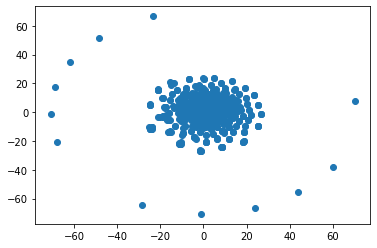

In [53]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.show()

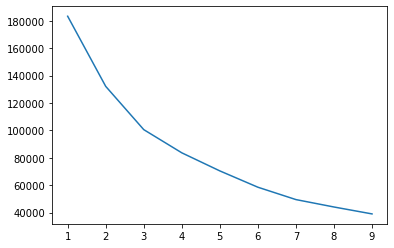

In [62]:
inertia=[]
for k in range(1,10):
    model=KMeans(n_clusters=k)
    model.fit(tsne_features)
    inertia.append(model.inertia_)
plt.plot(range(1,10), inertia)

In [63]:
# Identify the best number of clusters using the elbow curve
model=KMeans(n_clusters=6)
model.fit(tsne_features)

KMeans(n_clusters=6)

In [64]:
model.predict(tsne_features)

array([5, 5, 1, 5, 0, 0, 4, 1, 0, 2, 5, 2, 4, 2, 5, 2, 0, 2, 5, 5, 1, 5,
       5, 2, 5, 5, 1, 0, 5, 5, 2, 0, 5, 1, 5, 0, 1, 2, 5, 2, 5, 5, 1, 1,
       5, 2, 5, 2, 5, 1, 5, 5, 4, 5, 2, 0, 5, 1, 4, 1, 5, 4, 5, 5, 1, 5,
       5, 5, 1, 5, 0, 5, 5, 5, 2, 5, 5, 5, 5, 1, 5, 0, 4, 4, 4, 5, 5, 5,
       5, 0, 1, 0, 2, 1, 1, 2, 1, 5, 2, 4, 5, 0, 5, 5, 0, 5, 5, 5, 1, 2,
       0, 2, 5, 4, 5, 1, 0, 1, 1, 5, 0, 4, 5, 5, 5, 2, 5, 1, 4, 2, 2, 0,
       5, 1, 5, 2, 5, 0, 0, 1, 5, 5, 5, 5, 2, 0, 5, 4, 5, 0, 2, 2, 5, 4,
       5, 0, 1, 5, 0, 1, 1, 4, 3, 0, 0, 4, 5, 5, 5, 0, 5, 5, 1, 1, 5, 5,
       1, 4, 5, 1, 0, 0, 4, 5, 5, 4, 5, 1, 5, 1, 5, 5, 4, 1, 2, 1, 5, 5,
       0, 1, 1, 5, 1, 2, 0, 2, 1, 1, 4, 5, 1, 5, 0, 5, 4, 5, 0, 0, 0, 4,
       1, 5, 0, 4, 2, 4, 5, 5, 5, 1, 1, 4, 4, 2, 0, 5, 5, 0, 5, 5, 1, 1,
       5, 5, 1, 5, 2, 5, 5, 2, 5, 5, 5, 4, 5, 2, 1, 5, 0, 1, 0, 5, 5, 5,
       5, 4, 5, 1, 5, 1, 1, 4, 5, 5, 1, 1, 0, 1, 1, 1, 1, 4, 5, 1, 1, 5,
       1, 5, 0, 5, 0, 2, 1, 5, 5, 2, 3, 4, 1, 5, 5,